In [1]:
# Import all the neccessary dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

In [2]:
# Import the cleaned data and view the top 5 rows
df_new=pd.read_csv('df_new.csv',index_col=0)
df_new.head()

,YEAR,MONTH,TMAX_AVG,TMIN_AVG,PRCP_AVG,SNOW_AVG,SEASON
1951-04-01,1951,4,62.420000,46.344138,2.496552,0.0,Spring
1951-05-01,1951,5,72.656774,53.878710,4.367742,0.0,Spring
1951-06-01,1951,6,77.636000,62.666000,2.256667,0.0,Spring
1951-07-01,1951,7,85.140645,69.527097,3.193548,0.0,Summer
1951-08-01,1951,8,82.504516,67.320645,2.103226,0.0,Summer


In [3]:
from datetime import datetime

dataset = df_new[['TMAX_AVG']]
dataset['Month']=df_new.index.copy()
dataset['Month']= pd.to_datetime(dataset['Month'],infer_datetime_format=True)
indexedDataset= dataset.set_index(['Month'])
indexedDataset.head()

,TMAX_AVG
Month,
1951-04-01,62.420000
1951-05-01,72.656774
1951-06-01,77.636000
1951-07-01,85.140645
1951-08-01,82.504516


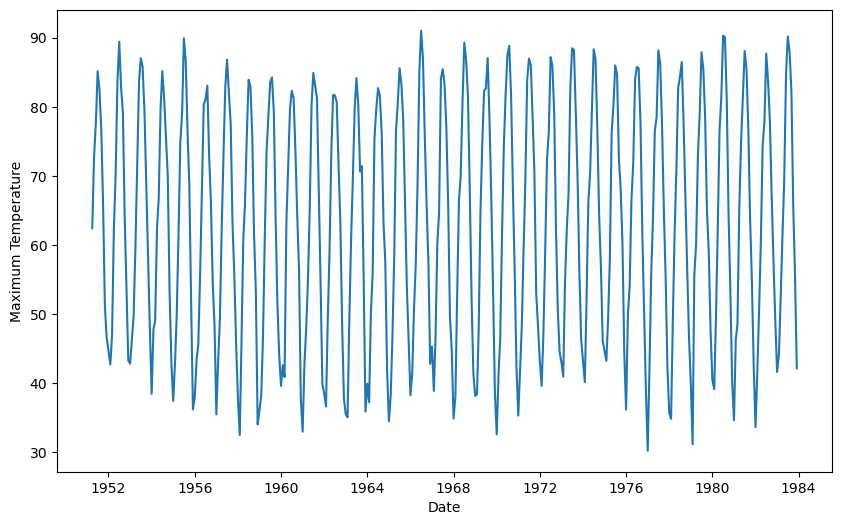

In [4]:
# plot graph
plt.xlabel('Date')
plt.ylabel('Maximum Temperature')
plt.plot(indexedDataset)
plt.show()


In [5]:
# Determine the rolling statistics
rolmean = indexedDataset.rolling(window=12).mean()
rolstd = indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

             TMAX_AVG
Month                
1951-04-01        NaN
1951-05-01        NaN
1951-06-01        NaN
1951-07-01        NaN
1951-08-01        NaN
...               ...
1983-08-01  65.200802
1983-09-01  65.555302
1983-10-01  65.431915
1983-11-01  65.254915
1983-12-01  64.663141

[393 rows x 1 columns]              TMAX_AVG
Month                
1951-04-01        NaN
1951-05-01        NaN
1951-06-01        NaN
1951-07-01        NaN
1951-08-01        NaN
...               ...
1983-08-01  17.073087
1983-09-01  17.401874
1983-10-01  17.392972
1983-11-01  17.490299
1983-12-01  18.186845

[393 rows x 1 columns]


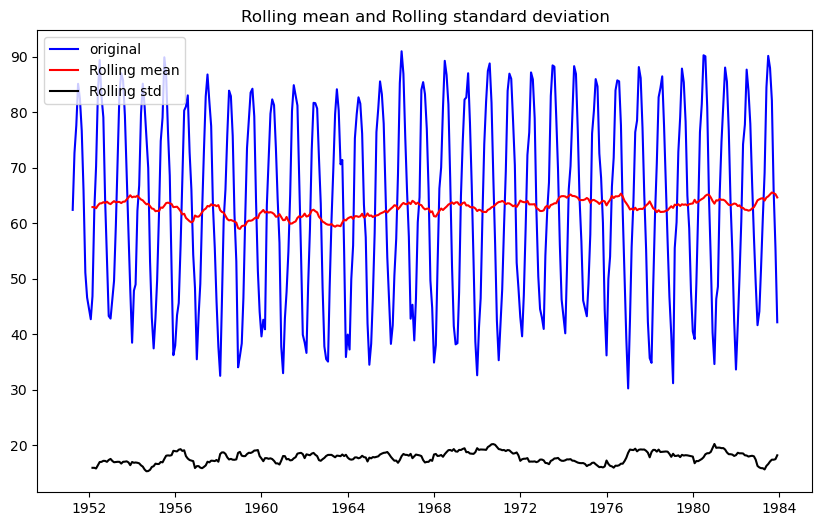

In [6]:
# plot rolling average  starting from 
orig =plt.plot(indexedDataset, color='blue', label='original')
mean= plt.plot(rolmean, color= 'red', label='Rolling mean')
std= plt.plot(rolstd, color='black', label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling mean and Rolling standard deviation')
plt.show(block=False)

In [7]:
# Perform Dicker-fuller test:
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-fuller test')
dftest= adfuller(indexedDataset['TMAX_AVG'], autolag='AIC')
dfoutput= pd.Series(dftest[0:4], index=['Test Statistics', 'p-value','#Lags used', 'Number of Observations used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]= value
    print(dfoutput)


Results of Dickey-fuller test
Test Statistics                 -2.888803
p-value                          0.046666
#Lags used                      13.000000
Number of Observations used    379.000000
Critical Value (1%)             -3.447722
dtype: float64
Test Statistics                 -2.888803
p-value                          0.046666
#Lags used                      13.000000
Number of Observations used    379.000000
Critical Value (1%)             -3.447722
Critical Value (5%)             -2.869196
dtype: float64
Test Statistics                 -2.888803
p-value                          0.046666
#Lags used                      13.000000
Number of Observations used    379.000000
Critical Value (1%)             -3.447722
Critical Value (5%)             -2.869196
Critical Value (10%)            -2.570849
dtype: float64


From the two tests above, it shows that our maximum temperature data is stationary ( since the p-value is low in the Dickey-fuller test and the average mean and std is relatively stable in the rolling average test), therefore there is no need to manipulate the data.

In [8]:
# Defining the function for determining the stationarity
def test_stationarity(timeseries):
    # Determining rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #plot rolling statistics:
    orig =plt.plot(timeseries, color='blue', label='Original')
    mean= plt.plot(movingAverage, color='red', label ='Rolling mean')
    std= plt.plot(rolstd, color='black', label='Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling mean and Rolling standard deviation')
    plt.show(block=False)
    
    # Perform Dicker-fuller test:

    print('Results of Dickey-fuller test')
    dftest= adfuller(indexedDataset['TMAX_AVG'], autolag='AIC')
    dfoutput= pd.Series(dftest[0:4], index=['Test Statistics', 'p-value','#Lags used', 'Number of Observations used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]= value
    print(dfoutput)

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose



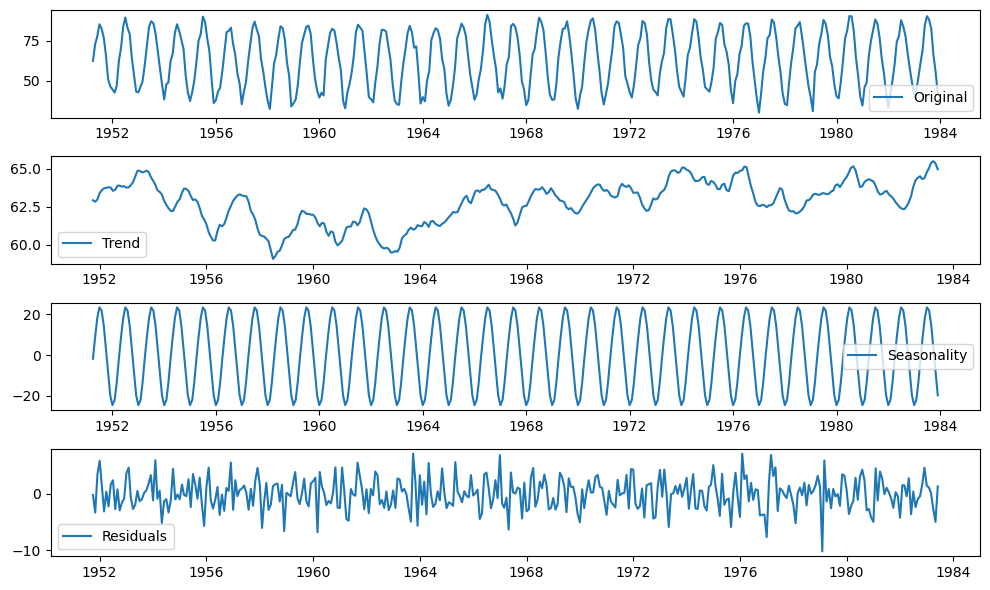

In [10]:
decomposition = seasonal_decompose(indexedDataset)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset, label= 'Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label= 'Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

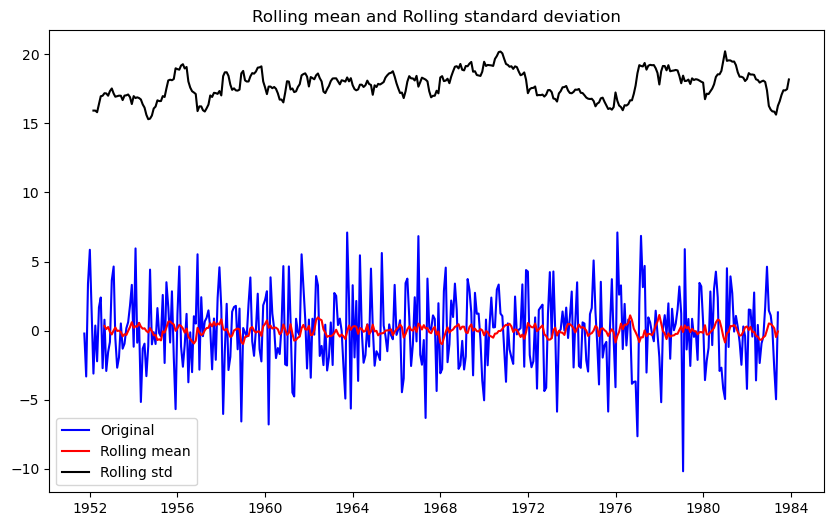

Results of Dickey-fuller test
Test Statistics                 -2.888803
p-value                          0.046666
#Lags used                      13.000000
Number of Observations used    379.000000
Critical Value (1%)             -3.447722
Critical Value (5%)             -2.869196
Critical Value (10%)            -2.570849
dtype: float64


In [11]:
# Remove the NAN from the residual dataset and testing the staionarity of the resulting dataset
decomposedData= residual
decomposedData.dropna(inplace= True)
test_stationarity(decomposedData)

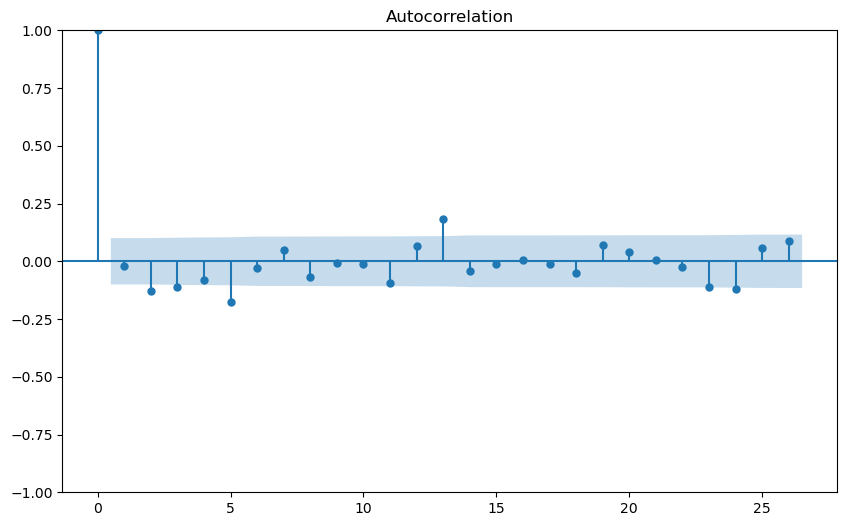

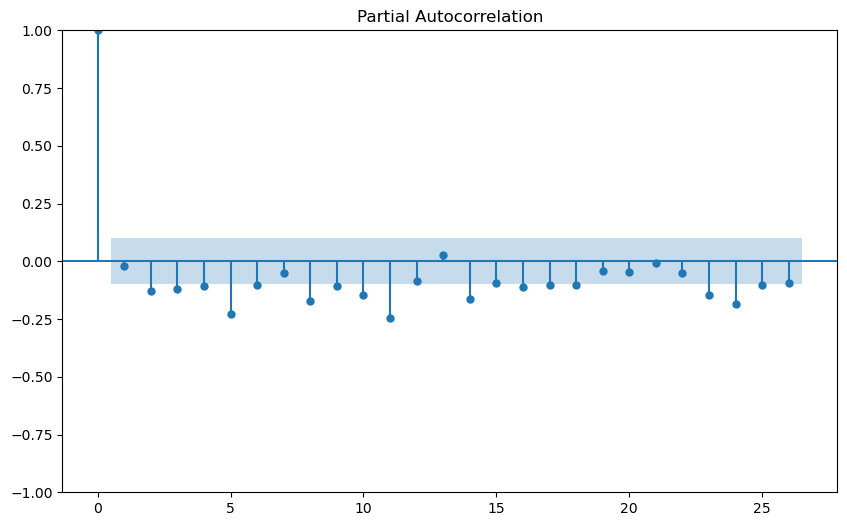

In [12]:
# Another test to check the residual noise
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(decomposedData)

pacf_original = plot_pacf(decomposedData)

The two tests above shows that the residual is okay.

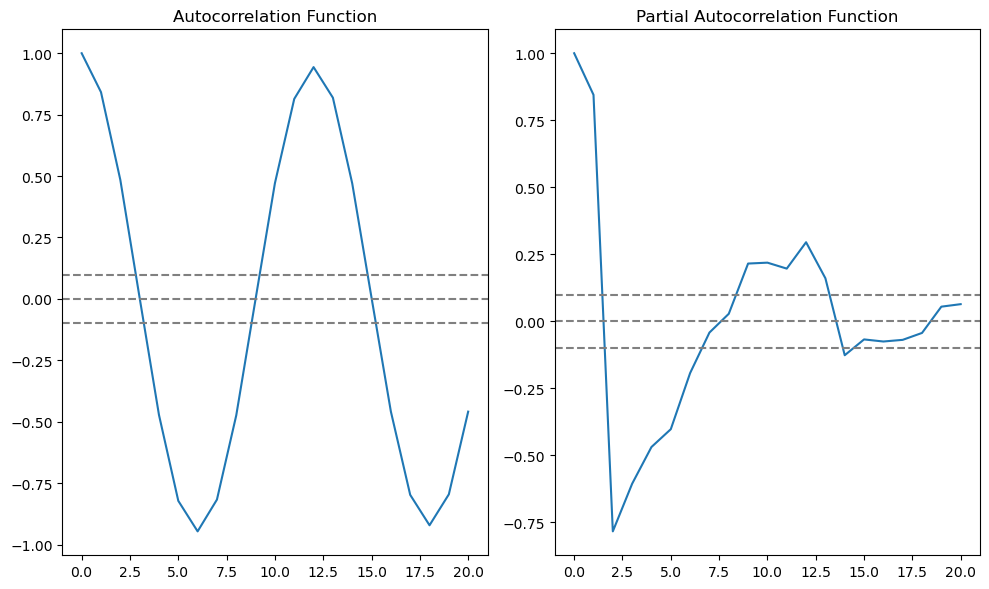

In [13]:
# ACF and PACF plots for the full data:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(indexedDataset, nlags = 20)
lag_pacf = pacf(indexedDataset, nlags = 20, method ='ols')

#plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(indexedDataset)), linestyle ='--', color ='gray')
plt.axhline(y=1.96/np.sqrt(len(indexedDataset)), linestyle ='--', color ='gray')
plt.title('Autocorrelation Function')

#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(indexedDataset)), linestyle ='--', color ='gray')
plt.axhline(y=1.96/np.sqrt(len(indexedDataset)), linestyle ='--', color ='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

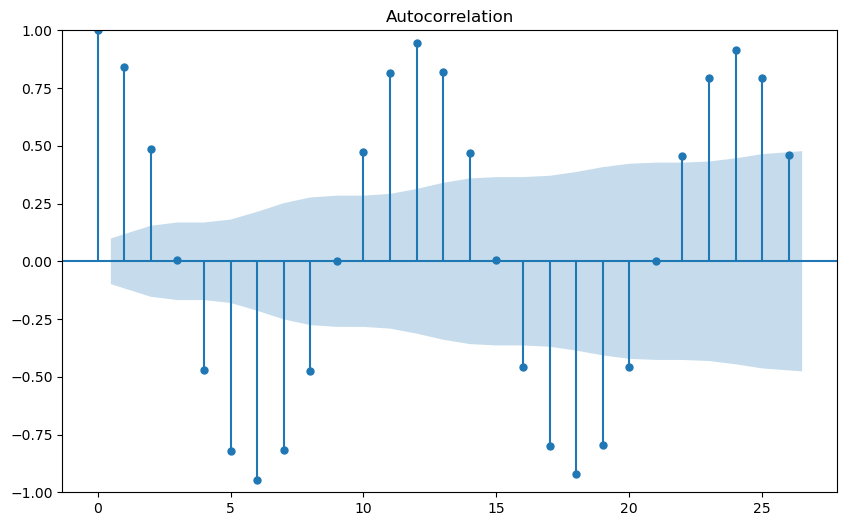

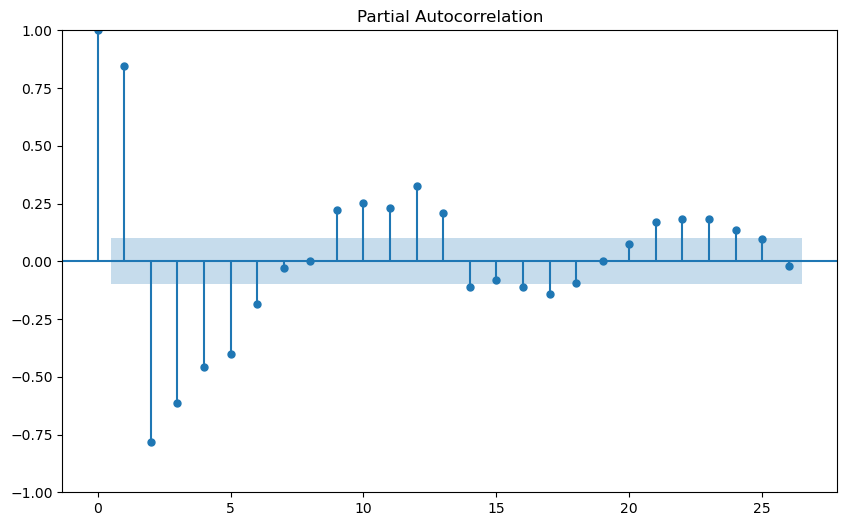

In [14]:
# Try another method of acf and pacf plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(indexedDataset)

pacf_original = plot_pacf(indexedDataset)

In [15]:
from statsmodels.tsa.arima.model import ARIMA

#ARIMA MODEL
model1 = ARIMA(indexedDataset, order= (3,0,2))
results_AR1 = model1.fit()
print(results_AR1.summary())

C:\Users\adeba\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\adeba\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\adeba\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               TMAX_AVG   No. Observations:                  393
Model:                 ARIMA(3, 0, 2)   Log Likelihood               -1010.041
Date:                Thu, 29 Jun 2023   AIC                           2034.081
Time:                        21:33:58   BIC                           2061.898
Sample:                    04-01-1951   HQIC                          2045.105
                         - 12-01-1983                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.8224      0.211    297.136      0.000      62.408      63.237
ar.L1          1.8925      0.050     37.978      0.000       1.795       1.990
ar.L2         -1.2783      0.086    -14.804      0.0

C:\Users\adeba\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


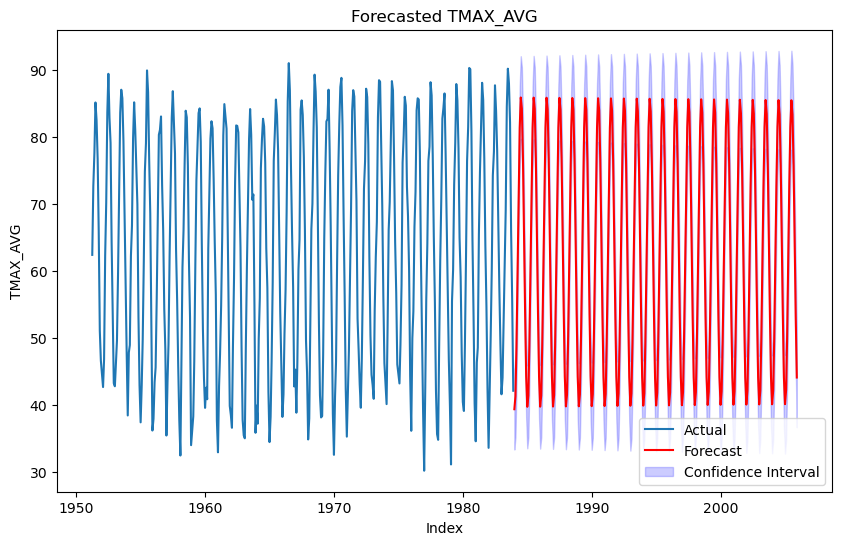

In [16]:
# Get and plot the forecasted values for the next 
forecast = results_AR1.get_forecast(steps=264)

# Extract the forecasted values and confidence intervals
forecasted_values = forecast.predicted_mean
confidence_interval = forecast.conf_int()

# Plot the forecasted values
plt.plot(indexedDataset['TMAX_AVG'])
plt.plot(forecasted_values, color='r')
plt.fill_between(confidence_interval.index, confidence_interval.iloc[:, 0], confidence_interval.iloc[:, 1], color='b', alpha=0.2)
plt.title('Forecasted TMAX_AVG')
plt.xlabel('Index')
plt.ylabel('TMAX_AVG')
plt.legend(['Actual', 'Forecast', 'Confidence Interval'])
plt.show()



In [17]:
# Print the Forecasted maximum Temperature value for the next 10 years (i.e from January 1984 to December 1993 )
x= results_AR1.forecast(steps=120)
x

1984-01-01    39.409446
1984-02-01    41.344372
1984-03-01    48.781237
1984-04-01    59.939946
1984-05-01    71.862800
                ...    
1993-08-01    83.855057
1993-09-01    76.362316
1993-10-01    65.240967
1993-11-01    53.473197
1993-12-01    44.213962
Freq: MS, Name: predicted_mean, Length: 120, dtype: float64

In [18]:
x[1]

41.34437191018655

Using Auto calculated ARIMA

In [19]:
import pmdarima as pm
auto_arima = pm.auto_arima(df_train, stepwise=False, seasonal=False)
auto_arima

NameError: name 'df_train' is not defined

In [ ]:
auto_arima.summary()